In [18]:
import os
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt

from core.dataset import HatefulMemesDataset

DATA_DIR = '/Users/nstanishev/Workspace/epfl/04/dl/project/data/'

In [49]:
all_df = pd.read_json(os.path.join(DATA_DIR, 'hateful_memes/all.jsonl'), lines=True)
train_df = pd.read_json(os.path.join(DATA_DIR, 'hateful_memes/train.jsonl'), lines=True)
dev_seen_df = pd.read_json(os.path.join(DATA_DIR, 'hateful_memes/dev_seen.jsonl'), lines=True)
dev_unseen_df = pd.read_json(os.path.join(DATA_DIR, 'hateful_memes/dev_unseen.jsonl'), lines=True)
test_seen_df = pd.read_json(os.path.join(DATA_DIR, 'hateful_memes/test_seen.jsonl'), lines=True)
test_unseen_df = pd.read_json(os.path.join(DATA_DIR, 'hateful_memes/test_unseen.jsonl'), lines=True)

In [33]:
def data_stats(df, name):
    print(name)
    print(len(df), len(df[df['label'] == 0]), len(df[df['label'] == 1]))
    plt.bar(['Not hateful', 'Hateful'], [len(df[df['label'] == 0]), len(df[df['label'] == 1])])
    plt.show()

ALL
12140 7634 4506


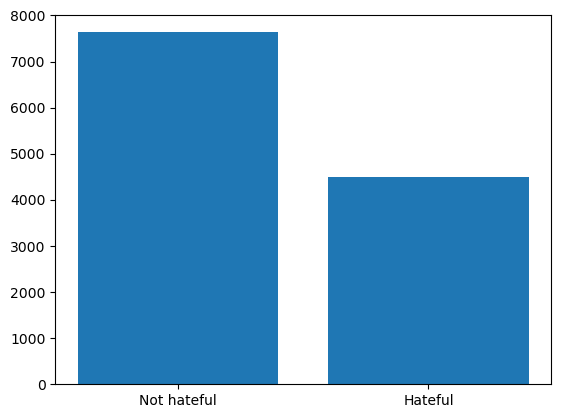

Train
8500 5481 3019


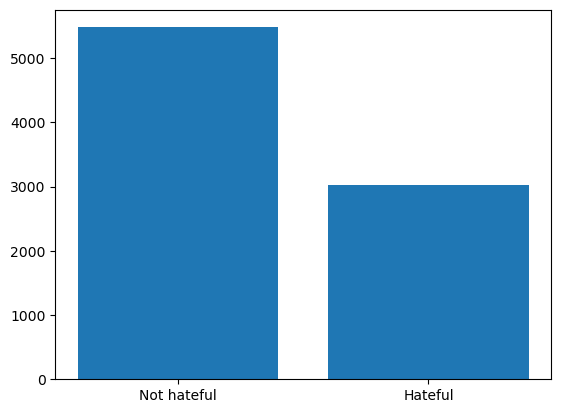

Dev All
640 393 247


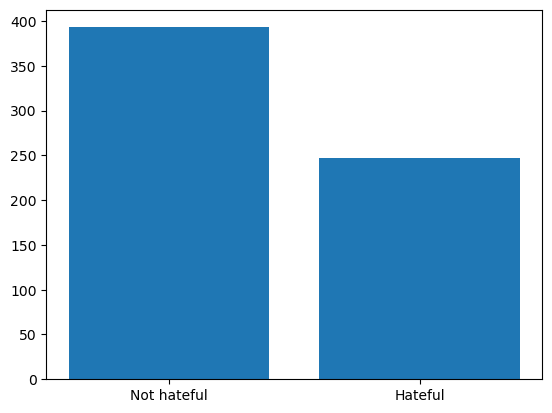

Test All
3000 1760 1240


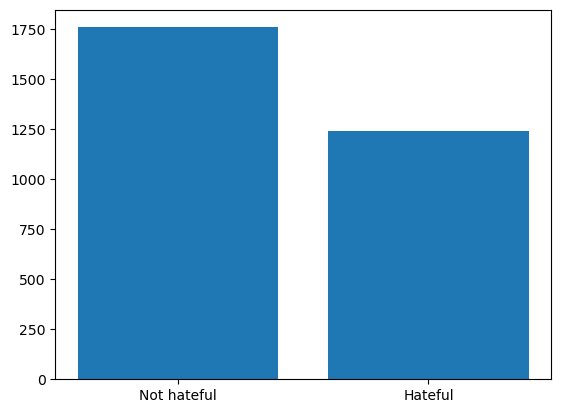

Dev Seen
500 253 247


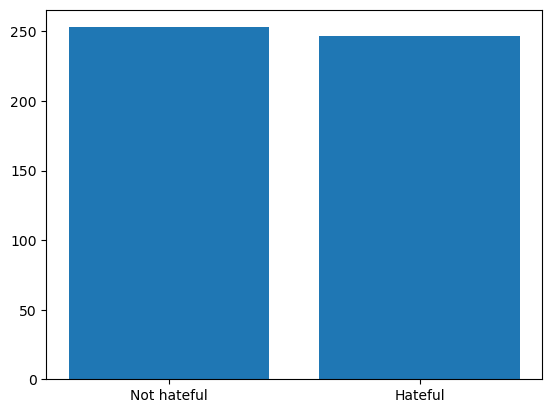

Dev Unseen
540 340 200


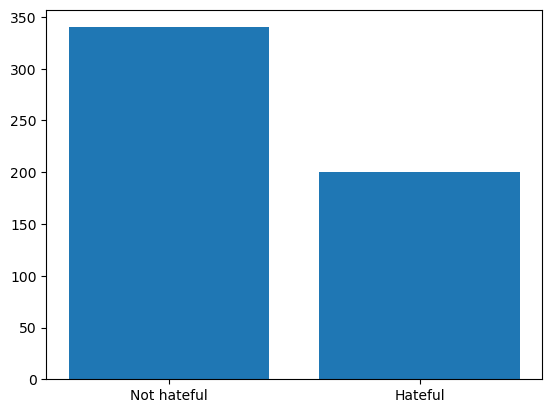

Test Seen
1000 510 490


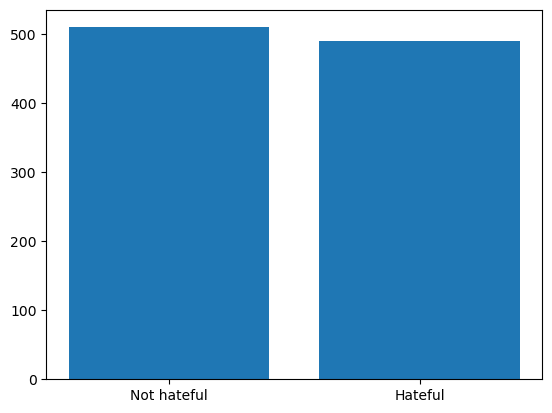

Test Unseen
2000 1250 750


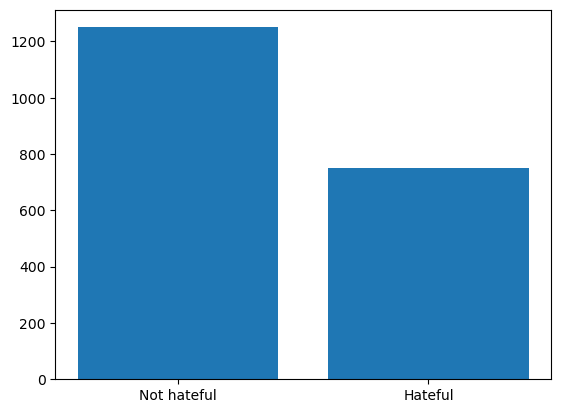

In [51]:
data_stats(pd.concat([train_df, dev_seen_df, dev_unseen_df, test_seen_df, test_unseen_df]).drop_duplicates(subset=['id']), 'ALL')
data_stats(train_df, 'Train')
data_stats(pd.concat([dev_seen_df, dev_unseen_df]).drop_duplicates(subset=['id']), 'Dev All')
data_stats(pd.concat([test_seen_df, test_unseen_df]).drop_duplicates(subset=['id']), 'Test All')
data_stats(dev_seen_df, 'Dev Seen')
data_stats(dev_unseen_df, 'Dev Unseen')
data_stats(test_seen_df, 'Test Seen')
data_stats(test_unseen_df, 'Test Unseen')


In [43]:
train_dataset = HatefulMemesDataset(os.path.join(DATA_DIR, 'hateful_memes/train.jsonl'))
val_dataset = HatefulMemesDataset(os.path.join(DATA_DIR, 'hateful_memes/dev.jsonl'))
test_dataset = HatefulMemesDataset(os.path.join(DATA_DIR, 'hateful_memes/test.jsonl'))

In [47]:
size = len(train_dataset) + len(val_dataset) + len(test_dataset)
(size, len(train_dataset), len(val_dataset), len(test_dataset)), \
((len(train_dataset) / size) * 100, (len(val_dataset) / size) * 100, (len(test_dataset) / size) * 100), \
(0.8 * size, 0.1 * size, 0.1 * size)

((12140, 8500, 640, 3000),
 (70.0164744645799, 5.2718286655683695, 24.71169686985173),
 (9712.0, 1214.0, 1214.0))